In [650]:
import pandas as pd
import pandas_ta as ta
import datetime
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, log_loss
import joblib

In [651]:
df = pd.read_csv('../data/btc_15m_data_2018_to_2025.csv')
df.drop(columns=['Close time', 'Quote asset volume', 'Number of trades',  'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'], inplace=True)
df.head()
df.set_index("Open time", inplace=True)
df.index = pd.to_datetime(df.index)




In [652]:
df.head()

,Open,High,Low,Close,Volume
Open time,,,,,
2018-01-01 00:00:00,13715.65,13715.65,13400.01,13556.15,123.616013
2018-01-01 00:15:00,13533.75,13550.87,13402.00,13521.12,98.136430
2018-01-01 00:30:00,13500.00,13545.37,13450.00,13470.41,79.904037
2018-01-01 00:45:00,13494.65,13690.87,13450.00,13529.01,141.699719
2018-01-01 01:00:00,13528.99,13571.74,13402.28,13445.63,72.537533


In [653]:
df.ta.sma(length=50, append=True)
df.ta.ema(length=50, append=True)
df.ta.wma(length=50, append=True)
df.ta.macd(fast=12, slow=26, append=True)
df.ta.rsi(length=14, append=True)
df.ta.bbands(length=20, append=True)
df.ta.adx(length=14, append=True)
df.ta.stoch(length=14, append=True)
df.ta.willr(length=14, append=True)
df.ta.roc(length=10, append=True)
df.ta.cci(length=20, append=True)
df.ta.atr(length=14, append=True)

# Additional indicators
df.ta.tsi(length=25, append=True)       # True Strength Index     
df.ta.ichimoku(append=True)             # Ichimoku Cloud                # Parabolic SAR
df.ta.obv(append=True)                  # On-Balance Volume
df.ta.vwap(append=True)                 # Volume Weighted Average Price
df.ta.donchian(length=20, append=True)  # Donchian Channels
df.ta.ema(length=10, append=True)       # Short-term EMA



# Drop rows with NaN values after adding indicators
# df.dropna(inplace=True)
df.drop(columns=['ISB_26'])
# Display the first few rows of the updated DataFrame
df.dropna(inplace=True)
df.head(50)

,Open,High,Low,Close,Volume,SMA_50,EMA_50,WMA_50,MACD_12_26_9,MACDh_12_26_9,...,ISB_26,ITS_9,IKS_26,ICS_26,OBV,VWAP_D,DCL_20_20,DCM_20_20,DCU_20_20,EMA_10
Open time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 19:15:00,13150.00,13238.00,13123.54,13200.00,57.747865,13274.4102,13239.930746,13171.185051,-20.713540,19.928091,...,13409.840,13098.140,13040.000,13600.00,-92.640667,13319.153029,12833.04,13081.520,13330.00,13141.250798
2018-01-01 19:30:00,13210.00,13280.00,13155.09,13260.31,71.309493,13264.1164,13240.729932,13170.632102,-9.477402,24.931384,...,13317.125,13110.000,13040.000,13582.00,-21.331174,13318.282596,12940.00,13135.000,13330.00,13162.897926
2018-01-01 19:45:00,13260.31,13290.65,13181.21,13240.37,66.125379,13254.9638,13240.715817,13169.700871,-2.156810,25.801580,...,13317.125,13115.325,13040.000,13437.17,-87.456553,13317.542164,12940.00,13135.000,13330.00,13176.983758
2018-01-01 20:00:00,13222.03,13440.38,13222.03,13421.03,133.602363,13250.4854,13247.786962,13176.213271,18.014899,36.778631,...,13317.125,13190.190,13095.190,13504.02,46.145810,13318.334120,12940.00,13190.190,13440.38,13221.355802
2018-01-01 20:15:00,13437.11,13455.00,13355.00,13380.00,98.482083,13246.6784,13252.971787,13181.292275,30.340598,39.283464,...,13317.125,13233.255,13102.500,13522.00,-52.336273,13319.368974,12940.00,13197.500,13455.00,13250.200201
2018-01-01 20:30:00,13382.37,13472.00,13374.48,13466.00,105.853180,13242.8738,13261.325834,13189.893122,46.512122,44.363990,...,13284.275,13286.475,13111.000,13320.06,53.516907,13321.022837,12940.00,13206.000,13472.00,13289.436528
2018-01-01 20:45:00,13469.37,13470.04,13360.00,13399.24,74.089242,13238.2008,13266.734233,13196.025129,53.326482,40.942681,...,13284.275,13286.475,13152.520,13400.00,-20.572335,13321.883993,12940.00,13206.000,13472.00,13309.400796
2018-01-01 21:00:00,13399.23,13551.99,13380.82,13518.46,117.586764,13239.8758,13276.605832,13207.015686,67.568087,44.147428,...,13284.275,13329.300,13245.995,13421.25,97.014429,13324.339351,12940.00,13245.995,13551.99,13347.411560
2018-01-01 21:15:00,13514.00,13536.00,13463.00,13516.78,64.669614,13240.2116,13286.024427,13217.874675,77.822016,43.521086,...,13284.275,13337.765,13245.995,13353.78,32.344815,13325.836149,12940.00,13245.995,13551.99,13378.205822


In [654]:
# Create an empty column for long/short/neutral signals
df['Signal'] = None

# Set the window size for calculating price differences.
# This is the number of bars (or candles) we'll look back to compare the current Close price against.
# For instance, a window_size of 2 will compare the current Close price against the Close price from 2 bars ago.
window_size = 5

def calculate_future_price(df, window=window_size):
    def weight_average(x):
        return np.dot(x, [0.30, 0.25, 0.2, 0.15, 0.1])  
    df['future_price'] = df['Close'].rolling(window=window).apply(weight_average, raw=True).shift(-window)
    return df
df = calculate_future_price(df)
df['predict_trend'] = df['future_price'] - df['Close']




In [655]:
df['predict_trend'].describe()


count    252513.000000
mean          0.699692
std         170.294124
min       -3833.688000
25%         -33.078500
50%           0.446500
75%          35.078000
max        4534.375500
Name: predict_trend, dtype: float64

In [656]:
# Create a function to determine the signal
def get_signal(threshold):
    df['Signal'] = np.where(df['predict_trend'] > threshold, 'Long', np.where(df['predict_trend'] < -threshold, 'Short', 'Neutral'))
    return df

df = get_signal(100)
df = df.dropna()

In [657]:
# Drop OHLC and Adj Close cause we need only indicators (If we need it cause for now we need Close price for backtesting our strategy)
df.drop(['Open', 'High', 'Low', 'predict_trend', 'future_price'], axis=1, inplace=True)
df.dropna(inplace=True)
# Now you can analyze indicator values at each signal point
long_condition = df['Signal'] == 'long'
short_condition = df['Signal'] == 'short'
neutral_condition = df['Signal'] == 'neutral'

long_indicators = df.loc[long_condition].select_dtypes(include=['float64']).mean()
short_indicators = df.loc[short_condition].select_dtypes(include=['float64']).mean()
neutral_indicators = df.loc[neutral_condition].select_dtypes(include=['float64']).mean()


# Finding relations between indicators, for example correlation matrix
correlation_matrix = df.select_dtypes(include=['float64']).corr()

# Mostly I care about Entering Position Long and Short
# print(f'\nCandle Look: {window_size}\n')
# print('Long Indicators:\n', long_indicators)
# print('Short Indicators:\n', short_indicators)
# print('Neutral Indicators:\n', neutral_indicators)
# print('Correlation Matrix:\n', correlation_matrix)

/var/folders/gn/mtbdxhjn1697bp_qhyd6y0cr0000gn/T/ipykernel_91733/1854189290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Open', 'High', 'Low', 'predict_trend', 'future_price'], axis=1, inplace=True)
/var/folders/gn/mtbdxhjn1697bp_qhyd6y0cr0000gn/T/ipykernel_91733/1854189290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [658]:
df['Signal'].head()

Open time
2018-01-01 19:15:00       Long
2018-01-01 19:30:00       Long
2018-01-01 19:45:00       Long
2018-01-01 20:00:00    Neutral
2018-01-01 20:15:00    Neutral
Name: Signal, dtype: object

In [659]:

# Remove NaN rows
df.dropna(inplace=True)
df.to_csv('../data/btc_15m_data_2018_to_2025_with_indicators.csv')
# Label encode the target column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Signal'])

# Prepare data
X = df.drop(['Signal'], axis=1)
y = y_encoded
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Split the data
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)

/var/folders/gn/mtbdxhjn1697bp_qhyd6y0cr0000gn/T/ipykernel_91733/2606539104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [660]:
print(df['Signal'][0:5], y_encoded[0:5])

Open time
2018-01-01 19:15:00       Long
2018-01-01 19:30:00       Long
2018-01-01 19:45:00       Long
2018-01-01 20:00:00    Neutral
2018-01-01 20:15:00    Neutral
Name: Signal, dtype: object [0 0 0 1 1]


In [661]:
# Fit the XGBoost model
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Initialize the XGBoost model
clf = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='mlogloss',  # Use mlogloss for multi-class classification
    reg_alpha=0.1,           # L1 regularization (default is 0)
    reg_lambda=1.0,          # L2 regularization (default is 1)
    random_state=42
)

# Specify a validation set
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the model
clf.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=True  # Print metrics for each tree
)

[0]	validation_0-mlogloss:1.02027	validation_1-mlogloss:1.02109
[1]	validation_0-mlogloss:0.95524	validation_1-mlogloss:0.95676
[2]	validation_0-mlogloss:0.90043	validation_1-mlogloss:0.90254
[3]	validation_0-mlogloss:0.85375	validation_1-mlogloss:0.85644
[4]	validation_0-mlogloss:0.81368	validation_1-mlogloss:0.81690
[5]	validation_0-mlogloss:0.77906	validation_1-mlogloss:0.78275
[6]	validation_0-mlogloss:0.74901	validation_1-mlogloss:0.75318
[7]	validation_0-mlogloss:0.72283	validation_1-mlogloss:0.72744
[8]	validation_0-mlogloss:0.69994	validation_1-mlogloss:0.70505
[9]	validation_0-mlogloss:0.67982	validation_1-mlogloss:0.68544
[10]	validation_0-mlogloss:0.66215	validation_1-mlogloss:0.66821
[11]	validation_0-mlogloss:0.64659	validation_1-mlogloss:0.65312
[12]	validation_0-mlogloss:0.63288	validation_1-mlogloss:0.63983
[13]	validation_0-mlogloss:0.62079	validation_1-mlogloss:0.62809
[14]	validation_0-mlogloss:0.61008	validation_1-mlogloss:0.61775
[15]	validation_0-mlogloss:0.60059	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [662]:
joblib.dump(clf, '../models/xgboost_model.joblib')

['../models/xgboost_model.joblib']

In [663]:
# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order and match the feature names
sorted_indices = np.argsort(importances)[::-1]
sorted_names = [feature_names[i] for i in sorted_indices]

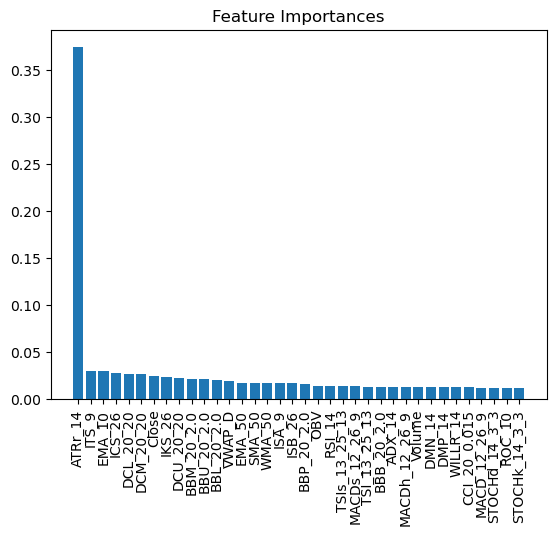

In [664]:
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), sorted_names, rotation=90)
plt.show()

              precision    recall  f1-score   support

           0       0.52      0.30      0.38      3313
           1       0.82      0.95      0.88     18759
           2       0.54      0.28      0.37      3180

    accuracy                           0.78     25252
   macro avg       0.63      0.51      0.54     25252
weighted avg       0.75      0.78      0.75     25252

ROC-AUC Score: 0.87


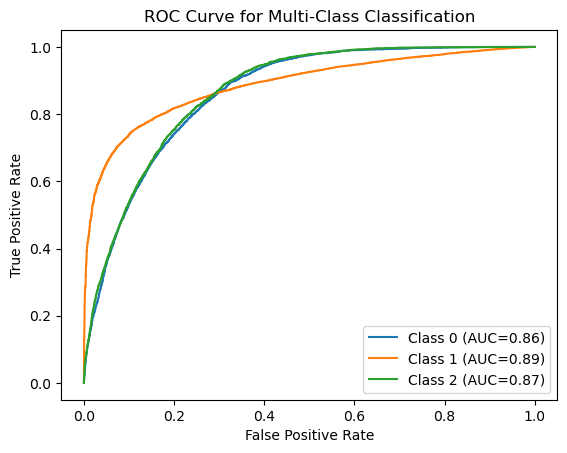

In [665]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Convert class labels to strings for classification_report
class_names = [str(cls) for cls in label_encoder.classes_]

# Generate classification report
report = classification_report(y_true=y_test, y_pred=y_pred, target_names=class_names)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Predict probabilities
probabilities = clf.predict_proba(X_test)

# Calculate ROC-AUC score
auc = roc_auc_score(y_test, probabilities, multi_class='ovr', average='macro')
print(f"ROC-AUC Score: {auc:.2f}")

# Binarize the true labels for each class
y_test_binarized = label_binarize(y_test, classes=clf.classes_)

# Plot ROC curve for each class
for i, class_name in enumerate(clf.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], probabilities[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_name} (AUC={roc_auc_score(y_test_binarized[:, i], probabilities[:, i]):.2f})")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend()
plt.show()


In [666]:

print(report)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {auc:.2f}")
# plt.plot(fpr, tpr, label=f"ROC Curve (AUC={auc:.2f})")
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()


              precision    recall  f1-score   support

           0       0.52      0.30      0.38      3313
           1       0.82      0.95      0.88     18759
           2       0.54      0.28      0.37      3180

    accuracy                           0.78     25252
   macro avg       0.63      0.51      0.54     25252
weighted avg       0.75      0.78      0.75     25252

Accuracy: 0.78
ROC-AUC Score: 0.87
